In [ ]:
import pandas as pd

# Load the dataset
file_path = 'updated_clothing_suggestions.csv'
df = pd.read_csv(file_path)

# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn names:", df.columns.tolist())

# Display the first few rows to understand the data structure
print("\nSample data:")
print(df.head())

# Show distribution of the 'Event_Category' column (replace 'Event_Category' with the actual column name)
if 'Event_Category' in df.columns:
    print("\nEvent Category distribution:")
    print(df['Event_Category'].value_counts())
else:
    print("\n'Event_Category' column not found.")


Number of rows: 5000
Number of columns: 8

Column names: ['Personality', 'Budget', 'Brand', 'Place to Wear', 'Combination of Clothes', 'Suitable Climate', 'Comfortability', 'Material']

Sample data:
  Personality  Budget       Brand  Place to Wear  \
0      Formal  Luxury        Zara         Office   
1      Formal  Medium      Uniqlo  Casual Outing   
2    Bohemian     Low         H&M   Formal Event   
3      Formal    High  Balenciaga      Night Out   
4  Streetwear  Luxury      Uniqlo          Beach   

                     Combination of Clothes Suitable Climate Comfortability  \
0     Leather Jacket + Skinny Jeans + Boots             Cold    Comfortable   
1               Tank Top + Shorts + Sandals              Hot         Casual   
2  Button-down Shirt + Slim Jeans + Brogues             Mild    Comfortable   
3       Sweatshirt + Cargo Pants + Trainers             Mild         Casual   
4     Cardigan + Dress Pants + Oxford Shoes             Mild       Moderate   

    Material 

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'updated_clothing_suggestions.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic information about the dataset
print("\nDataset info:")
print(df.info())

# Feature Engineering
# Example: Filling missing values and creating new features

# Filling missing values (example: fill numeric columns with mean and categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill missing categorical data with mode
    else:
        df[col].fillna(df[col].mean(), inplace=True)  # Fill missing numerical data with mean

# Feature Engineering Example 1: Creating a new column based on existing data
# If the dataset contains price-related information, we can create a 'price_category' feature
# Example assuming a 'price' column exists:
if 'price' in df.columns:
    df['price_category'] = pd.cut(df['price'], bins=[0, 50, 100, 200, np.inf], labels=['Low', 'Medium', 'High', 'Premium'])

# Feature Engineering Example 2: Extracting information from a date column
# Assuming there's a 'purchase_date' column
if 'purchase_date' in df.columns:
    df['purchase_year'] = pd.to_datetime(df['purchase_date']).dt.year
    df['purchase_month'] = pd.to_datetime(df['purchase_date']).dt.month

# Save the processed dataset
output_file = 'processed_clothing_suggestions.csv'
df.to_csv(output_file, index=False)
print(f"\nProcessed dataset saved as: {output_file}")


First few rows of the dataset:
  Personality  Budget       Brand  Place to Wear  \
0      Formal  Luxury        Zara         Office   
1      Formal  Medium      Uniqlo  Casual Outing   
2    Bohemian     Low         H&M   Formal Event   
3      Formal    High  Balenciaga      Night Out   
4  Streetwear  Luxury      Uniqlo          Beach   

                     Combination of Clothes Suitable Climate Comfortability  \
0     Leather Jacket + Skinny Jeans + Boots             Cold    Comfortable   
1               Tank Top + Shorts + Sandals              Hot         Casual   
2  Button-down Shirt + Slim Jeans + Brogues             Mild    Comfortable   
3       Sweatshirt + Cargo Pants + Trainers             Mild         Casual   
4     Cardigan + Dress Pants + Oxford Shoes             Mild       Moderate   

    Material  
0       Wool  
1     Cotton  
2  Polyester  
3  Polyester  
4  Polyester  

Missing values:
Personality               0
Budget                    0
Brand             

<ipython-input-2-31c486339cde>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill missing categorical data with mode


In [ ]:
# Importing required libraries
import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading required nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load the dataset
file_path = 'updated_clothing_suggestions.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Text Processing Functions
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert text to lowercase and tokenize
    return tokens

def apply_stemming(tokens, stemmer_type="porter"):
    # Stemming (Porter or Snowball stemmer)
    if stemmer_type == "porter":
        stemmer = PorterStemmer()
    else:
        stemmer = SnowballStemmer("english")

    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def apply_lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply tokenization, stemming, and lemmatization on a text column
# Assuming there's a column named 'description' for demonstration
if 'description' in df.columns:
    df['tokens'] = df['description'].apply(preprocess_text)
    df['stemmed_tokens'] = df['tokens'].apply(lambda x: apply_stemming(x, stemmer_type="porter"))  # Using Porter stemmer
    df['lemmatized_tokens'] = df['tokens'].apply(apply_lemmatization)

# Save the processed dataset
output_file = 'processed_clothing_suggestions_with_nlp.csv'
df.to_csv(output_file, index=False)
print(f"\nProcessed dataset saved with tokenization, stemming, and lemmatization: {output_file}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...


First few rows of the dataset:
  Personality  Budget       Brand  Place to Wear  \
0      Formal  Luxury        Zara         Office   
1      Formal  Medium      Uniqlo  Casual Outing   
2    Bohemian     Low         H&M   Formal Event   
3      Formal    High  Balenciaga      Night Out   
4  Streetwear  Luxury      Uniqlo          Beach   

                     Combination of Clothes Suitable Climate Comfortability  \
0     Leather Jacket + Skinny Jeans + Boots             Cold    Comfortable   
1               Tank Top + Shorts + Sandals              Hot         Casual   
2  Button-down Shirt + Slim Jeans + Brogues             Mild    Comfortable   
3       Sweatshirt + Cargo Pants + Trainers             Mild         Casual   
4     Cardigan + Dress Pants + Oxford Shoes             Mild       Moderate   

    Material  
0       Wool  
1     Cotton  
2  Polyester  
3  Polyester  
4  Polyester  

Processed dataset saved with tokenization, stemming, and lemmatization: processed_clothing

[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return tokens
    print(tokens)


In [ ]:
def apply_stemming(tokens, stemmer_type="porter"):
    if stemmer_type == "porter":
        stemmer = PorterStemmer()
    else:
        stemmer = SnowballStemmer("english")

    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens


In [ ]:
def apply_lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


In [ ]:
def apply_lemmatization(tokens, pos_tag='n'):  # 'n' is for noun
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=pos_tag) for token in tokens]
    return lemmatized_tokens


In [ ]:
# Importing required libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Downloading necessary nltk resources
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
file_path = 'updated_clothing_suggestions.csv'
df = pd.read_csv(file_path)

# Display the columns in the dataset
print("Available columns in the dataset:")
print(df.columns)

# Check the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Identify the correct text column for tokenization, stemming, and lemmatization
# Replace 'description' with the actual column name after inspecting
if 'description' in df.columns:
    df['tokens'] = df['description'].apply(preprocess_text)
    df['stemmed_tokens'] = df['tokens'].apply(lambda x: apply_stemming(x, stemmer_type="porter"))  # Using Porter stemmer
    df['lemmatized_tokens'] = df['tokens'].apply(apply_lemmatization)

    # Display the results
    print("\nTokenized 'description' column:")
    print(df[['description', 'tokens']].head())

    print("\nStemmed tokens (using Porter Stemmer):")
    print(df[['description', 'stemmed_tokens']].head())

    print("\nLemmatized tokens:")
    print(df[['description', 'lemmatized_tokens']].head())
else:
    print("The column 'description' does not exist in the dataset. Please use the correct text column name.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Available columns in the dataset:
Index(['Personality', 'Budget', 'Brand', 'Place to Wear',
       'Combination of Clothes', 'Suitable Climate', 'Comfortability',
       'Material'],
      dtype='object')

First few rows of the dataset:
  Personality  Budget       Brand  Place to Wear  \
0      Formal  Luxury        Zara         Office   
1      Formal  Medium      Uniqlo  Casual Outing   
2    Bohemian     Low         H&M   Formal Event   
3      Formal    High  Balenciaga      Night Out   
4  Streetwear  Luxury      Uniqlo          Beach   

                     Combination of Clothes Suitable Climate Comfortability  \
0     Leather Jacket + Skinny Jeans + Boots             Cold    Comfortable   
1               Tank Top + Shorts + Sandals              Hot         Casual   
2  Button-down Shirt + Slim Jeans + Brogues             Mild    Comfortable   
3       Sweatshirt + Cargo Pants + Trainers             Mild         Casual   
4     Cardigan + Dress Pants + Oxford Shoes            

In [ ]:
!pip install langchain


In [ ]:
!pip install openai
!pip install pydantic


In [ ]:
!pip install langchain_community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.15
    Uninstalling langchain-core-0.3.15:
      Successfully uninstalled langchain-core-0.3.15


In [ ]:
!pip install openai
!pip install pydantic


In [ ]:
!pip install tensorflow


In [ ]:
!pip install tensorflow nltk


In [ ]:
!pip install tensorflow


In [ ]:
import os
import pandas as pd
import numpy as np
import nltk
import random
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define a function to check and download NLTK data
def download_nltk_data():
    nltk_data_path = "/root/nltk_data"
    if not os.path.exists(nltk_data_path):
        os.makedirs(nltk_data_path)
    nltk.data.path.append(nltk_data_path)

    # Download necessary packages
    for package in ['punkt', 'stopwords', 'wordnet', 'punkt_tab']: # Include 'punkt_tab' here
        try:
            nltk.data.find(f'tokenizers/{package}')
        except LookupError:
            nltk.download(package, download_dir=nltk_data_path)

# Download NLTK data
download_nltk_data()

# Load your dataset
df = pd.read_csv('processed_clothing_suggestions.csv')  # Update with your actual filename

# Data Preprocessing
text_columns = ['Combination of Clothes', 'Suitable Climate', 'Comfortability', 'Material', 'Brand']
df[text_columns] = df[text_columns].apply(lambda col: col.str.lower())
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

df['text'] = df[text_columns].agg(' '.join, axis=1).apply(preprocess_text)

# Data Augmentation Functions
def random_deletion(text, p=0.1):
    """Randomly deletes words from the text with a given probability p."""
    words = text.split()
    if len(words) == 1:
        return text
    return ' '.join([word for word in words if random.uniform(0, 1) > p])

def random_swap(text, n=2):
    """Randomly swaps words in the text n times."""
    words = text.split()
    length = len(words)
    if length < 2:
        return text
    for _ in range(min(n, length // 2)):
        idx1, idx2 = random.sample(range(length), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_insertion(text, n=2):
    """Randomly inserts synonyms into the text n times."""
    words = text.split()
    for _ in range(n):
        new_word = get_random_synonym(words)
        if new_word:
            random_idx = random.randint(0, len(words) - 1)
            words.insert(random_idx, new_word)
    return ' '.join(words)

def get_random_synonym(words):
    """Gets a random synonym for a word in the list."""
    word = random.choice(words)
    synonyms = wordnet.synsets(word)
    if synonyms:
        synonym = synonyms[0].lemmas()[0].name()
        return synonym if synonym != word else None
    return None

# Apply data augmentation to each text
df['text_augmented'] = df['text'].apply(lambda x: random_insertion(random_swap(random_deletion(x)), n=2))

# Prepare data for the model
X = df['text_augmented']
y = df['Combination of Clothes']  # Adjust based on your target label

# Encode the labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding sequences to ensure uniform input size
max_length = 100  # Adjust this based on your dataset's average text length
X_padded = pad_sequences(X_sequences, maxlen=max_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
embedding_dim = 128  # Dimension of the word embedding
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))

# First Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))

# Second Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))

# Fully connected layer with softmax for multi-class classification
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Check when early stopping was triggered
print(f'Early stopping was triggered after {early_stopping.stopped_epoch} epochs')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 195ms/step - accuracy: 0.1983 - loss: 2.6289 - val_accuracy: 0.9125 - val_loss: 0.7452
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.8709 - loss: 0.7990 - val_accuracy: 0.9112 - val_loss: 0.3590
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.8979 - loss: 0.5017 - val_accuracy: 0.9287 - val_loss: 0.2707
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.9106 - loss: 0.3816 - val_accuracy: 0.9438 - val_loss: 0.2305
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - accuracy: 0.9222 - loss: 0.3097 - val_accuracy: 0.9388 - val_loss: 0.2095
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.9200 - loss: 0.2915 - val_accuracy: 0.9638 - val_loss: 0.1843
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.9270 - loss: 0.2684 - val_accuracy: 0.9688 - val_loss: 0.1597
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9484 - loss: 0

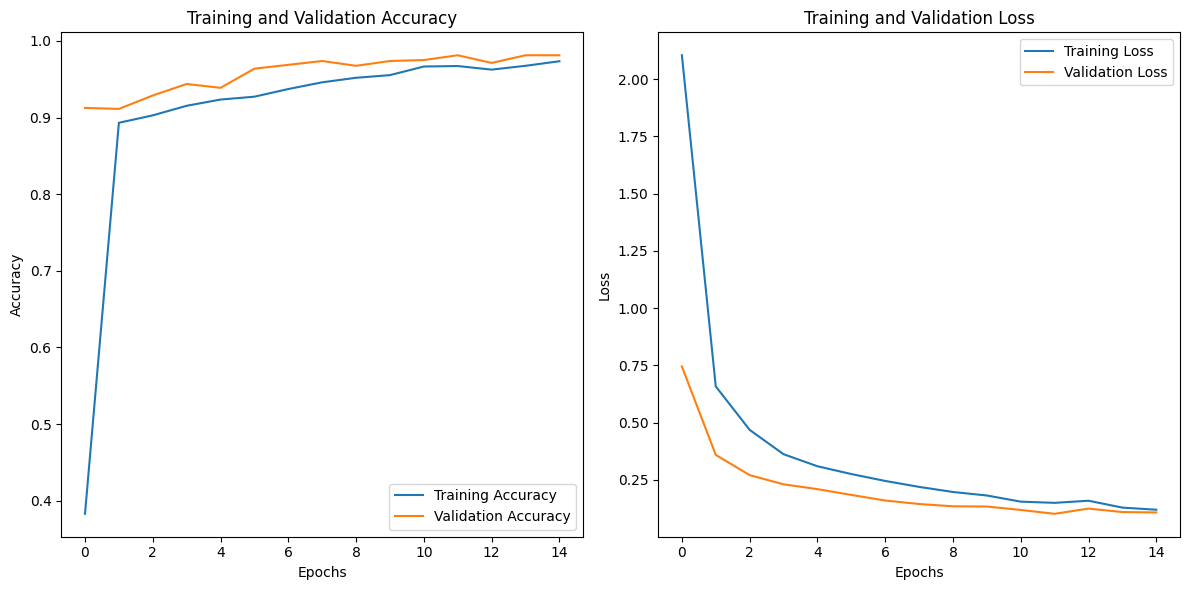

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import nltk
import random
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define a function to check and download NLTK data
def download_nltk_data():
    nltk_data_path = "/root/nltk_data"
    if not os.path.exists(nltk_data_path):
        os.makedirs(nltk_data_path)
    nltk.data.path.append(nltk_data_path)

    # Download necessary packages
    for package in ['punkt', 'stopwords', 'wordnet', 'punkt_tab']: # Include 'punkt_tab' here
        try:
            nltk.data.find(f'tokenizers/{package}')
        except LookupError:
            nltk.download(package, download_dir=nltk_data_path)

# Download NLTK data
download_nltk_data()

# Load your dataset
df = pd.read_csv('processed_clothing_suggestions.csv')  # Update with your actual filename

# Data Preprocessing
text_columns = ['Combination of Clothes', 'Suitable Climate', 'Comfortability', 'Material', 'Brand']
df[text_columns] = df[text_columns].apply(lambda col: col.str.lower())
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

df['text'] = df[text_columns].agg(' '.join, axis=1).apply(preprocess_text)

# Data Augmentation Functions
def random_deletion(text, p=0.1):
    """Randomly deletes words from the text with a given probability p."""
    words = text.split()
    if len(words) == 1:
        return text
    return ' '.join([word for word in words if random.uniform(0, 1) > p])

def random_swap(text, n=2):
    """Randomly swaps words in the text n times."""
    words = text.split()
    length = len(words)
    if length < 2:
        return text
    for _ in range(min(n, length // 2)):
        idx1, idx2 = random.sample(range(length), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_insertion(text, n=2):
    """Randomly inserts synonyms into the text n times."""
    words = text.split()
    for _ in range(n):
        new_word = get_random_synonym(words)
        if new_word:
            random_idx = random.randint(0, len(words) - 1)
            words.insert(random_idx, new_word)
    return ' '.join(words)

def get_random_synonym(words):
    """Gets a random synonym for a word in the list."""
    word = random.choice(words)
    synonyms = wordnet.synsets(word)
    if synonyms:
        synonym = synonyms[0].lemmas()[0].name()
        return synonym if synonym != word else None
    return None

# Apply data augmentation to each text
df['text_augmented'] = df['text'].apply(lambda x: random_insertion(random_swap(random_deletion(x)), n=2))

# Prepare data for the model
X = df['text_augmented']
y = df['Comfortability']  # Adjust based on your target label

# Encode the labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding sequences to ensure uniform input size
max_length = 100  # Adjust this based on your dataset's average text length
X_padded = pad_sequences(X_sequences, maxlen=max_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
embedding_dim = 128  # Dimension of the word embedding
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))

# First Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))

# Second Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))

# Fully connected layer with softmax for multi-class classification
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Check when early stopping was triggered
print(f'Early stopping was triggered after {early_stopping.stopped_epoch} epochs')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 242ms/step - accuracy: 0.4893 - loss: 1.1416 - val_accuracy: 0.9513 - val_loss: 0.2042
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.9534 - loss: 0.1515 - val_accuracy: 0.9438 - val_loss: 0.1106
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.9500 - loss: 0.1264 - val_accuracy: 0.9438 - val_loss: 0.1067
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 236ms/step - accuracy: 0.9569 - loss: 0.1041 - val_accuracy: 0.9388 - val_loss: 0.1156
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.9574 - loss: 0.1074 - val_accuracy: 0.9475 - val_loss: 0.1184
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.9540 - loss: 0.1103 - val_accuracy: 0.9463 - val_loss: 0.1226
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9680 - loss: 0.0847
Test Accuracy: 0.96
Early stopping was triggered after 5 epochs


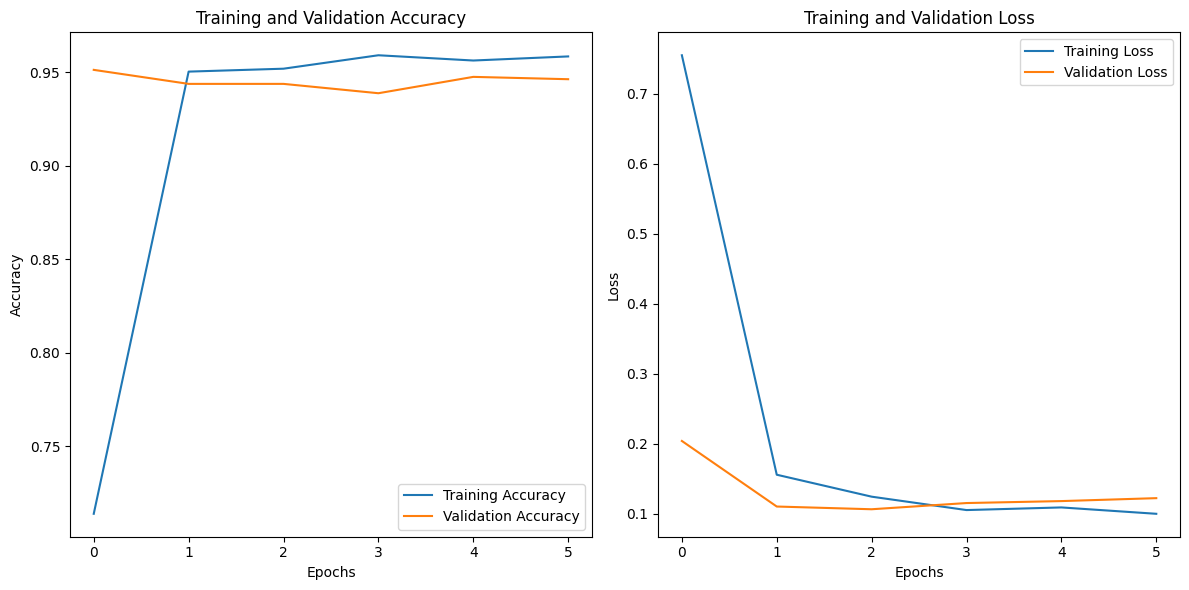

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import nltk
import random
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define a function to check and download NLTK data
def download_nltk_data():
    nltk_data_path = "/root/nltk_data"
    if not os.path.exists(nltk_data_path):
        os.makedirs(nltk_data_path)
    nltk.data.path.append(nltk_data_path)

    # Download necessary packages
    for package in ['punkt', 'stopwords', 'wordnet', 'punkt_tab']: # Include 'punkt_tab' here
        try:
            nltk.data.find(f'tokenizers/{package}')
        except LookupError:
            nltk.download(package, download_dir=nltk_data_path)

# Download NLTK data
download_nltk_data()

# Load your dataset
df = pd.read_csv('processed_clothing_suggestions.csv')  # Update with your actual filename

# Data Preprocessing
text_columns = ['Combination of Clothes', 'Suitable Climate', 'Comfortability', 'Material', 'Brand']
df[text_columns] = df[text_columns].apply(lambda col: col.str.lower())
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

df['text'] = df[text_columns].agg(' '.join, axis=1).apply(preprocess_text)

# Data Augmentation Functions
def random_deletion(text, p=0.1):
    """Randomly deletes words from the text with a given probability p."""
    words = text.split()
    if len(words) == 1:
        return text
    return ' '.join([word for word in words if random.uniform(0, 1) > p])

def random_swap(text, n=2):
    """Randomly swaps words in the text n times."""
    words = text.split()
    length = len(words)
    if length < 2:
        return text
    for _ in range(min(n, length // 2)):
        idx1, idx2 = random.sample(range(length), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_insertion(text, n=2):
    """Randomly inserts synonyms into the text n times."""
    words = text.split()
    for _ in range(n):
        new_word = get_random_synonym(words)
        if new_word:
            random_idx = random.randint(0, len(words) - 1)
            words.insert(random_idx, new_word)
    return ' '.join(words)

def get_random_synonym(words):
    """Gets a random synonym for a word in the list."""
    word = random.choice(words)
    synonyms = wordnet.synsets(word)
    if synonyms:
        synonym = synonyms[0].lemmas()[0].name()
        return synonym if synonym != word else None
    return None

# Apply data augmentation to each text
df['text_augmented'] = df['text'].apply(lambda x: random_insertion(random_swap(random_deletion(x)), n=2))

# Prepare data for the model
X = df['text_augmented']
y = df['Material']  # Adjust based on your target label

# Encode the labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding sequences to ensure uniform input size
max_length = 100  # Adjust this based on your dataset's average text length
X_padded = pad_sequences(X_sequences, maxlen=max_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
embedding_dim = 128  # Dimension of the word embedding
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))

# First Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))

# Second Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))

# Fully connected layer with softmax for multi-class classification
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Check when early stopping was triggered
print(f'Early stopping was triggered after {early_stopping.stopped_epoch} epochs')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - accuracy: 0.3724 - loss: 1.4301 - val_accuracy: 0.8750 - val_loss: 0.4807
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 191ms/step - accuracy: 0.9101 - loss: 0.3600 - val_accuracy: 0.9162 - val_loss: 0.2275
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.9289 - loss: 0.2213 - val_accuracy: 0.9212 - val_loss: 0.1867
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9341 - loss: 0.1849 - val_accuracy: 0.9287 - val_loss: 0.1967
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.9330 - loss: 0.1924 - val_accuracy: 0.9200 - val_loss: 0.1874
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.9315 - loss: 0.1804 - val_accuracy: 0.9150 - val_loss: 0.1919
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9276 - loss: 0.1838
Test Accuracy: 0.93
Early stopping was triggered after 5 epochs


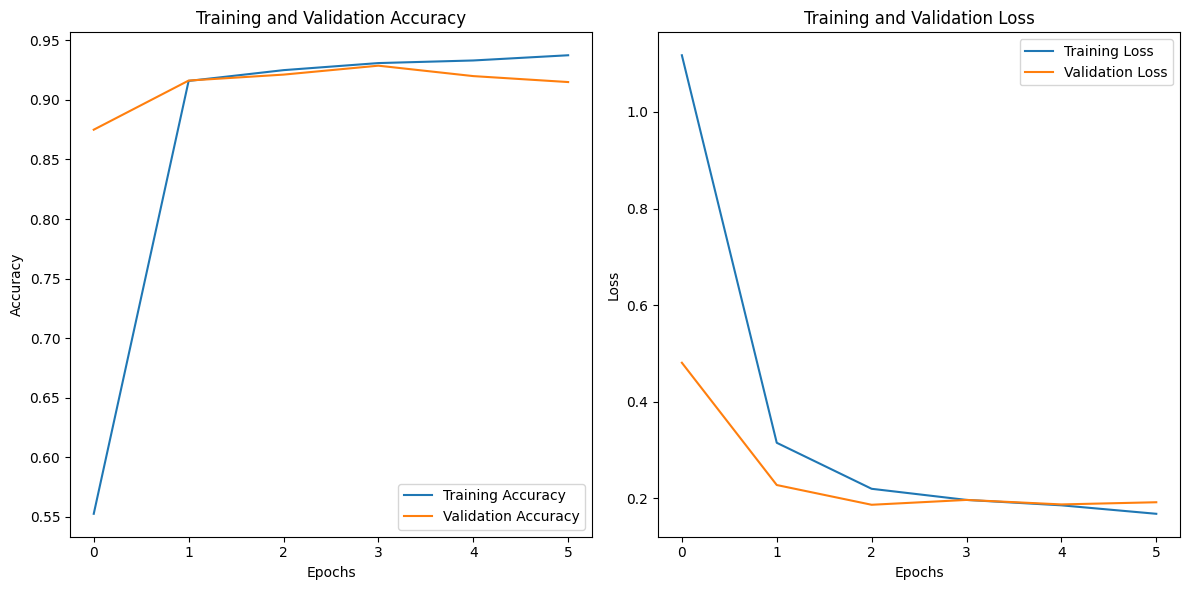

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import nltk
import random
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define a function to check and download NLTK data
def download_nltk_data():
    nltk_data_path = "/root/nltk_data"
    if not os.path.exists(nltk_data_path):
        os.makedirs(nltk_data_path)
    nltk.data.path.append(nltk_data_path)

    # Download necessary packages
    for package in ['punkt', 'stopwords', 'wordnet', 'punkt_tab']: # Include 'punkt_tab' here
        try:
            nltk.data.find(f'tokenizers/{package}')
        except LookupError:
            nltk.download(package, download_dir=nltk_data_path)

# Download NLTK data
download_nltk_data()

# Load your dataset
df = pd.read_csv('processed_clothing_suggestions.csv')  # Update with your actual filename

# Data Preprocessing
text_columns = ['Combination of Clothes', 'Suitable Climate', 'Comfortability', 'Material', 'Brand']
df[text_columns] = df[text_columns].apply(lambda col: col.str.lower())
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

df['text'] = df[text_columns].agg(' '.join, axis=1).apply(preprocess_text)

# Data Augmentation Functions
def random_deletion(text, p=0.1):
    """Randomly deletes words from the text with a given probability p."""
    words = text.split()
    if len(words) == 1:
        return text
    return ' '.join([word for word in words if random.uniform(0, 1) > p])

def random_swap(text, n=2):
    """Randomly swaps words in the text n times."""
    words = text.split()
    length = len(words)
    if length < 2:
        return text
    for _ in range(min(n, length // 2)):
        idx1, idx2 = random.sample(range(length), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_insertion(text, n=2):
    """Randomly inserts synonyms into the text n times."""
    words = text.split()
    for _ in range(n):
        new_word = get_random_synonym(words)
        if new_word:
            random_idx = random.randint(0, len(words) - 1)
            words.insert(random_idx, new_word)
    return ' '.join(words)

def get_random_synonym(words):
    """Gets a random synonym for a word in the list."""
    word = random.choice(words)
    synonyms = wordnet.synsets(word)
    if synonyms:
        synonym = synonyms[0].lemmas()[0].name()
        return synonym if synonym != word else None
    return None

# Apply data augmentation to each text
df['text_augmented'] = df['text'].apply(lambda x: random_insertion(random_swap(random_deletion(x)), n=2))

# Prepare data for the model
X = df['text_augmented']
y = df['Brand']  # Adjust based on your target label

# Encode the labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding sequences to ensure uniform input size
max_length = 100  # Adjust this based on your dataset's average text length
X_padded = pad_sequences(X_sequences, maxlen=max_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
embedding_dim = 128  # Dimension of the word embedding
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))

# First Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))

# Second Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))

# Fully connected layer with softmax for multi-class classification
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Check when early stopping was triggered
print(f'Early stopping was triggered after {early_stopping.stopped_epoch} epochs')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 209ms/step - accuracy: 0.1220 - loss: 2.5206 - val_accuracy: 0.6800 - val_loss: 1.3634
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 225ms/step - accuracy: 0.6947 - loss: 1.2133 - val_accuracy: 0.9125 - val_loss: 0.4912
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.8714 - loss: 0.6462 - val_accuracy: 0.9075 - val_loss: 0.3699
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 221ms/step - accuracy: 0.8885 - loss: 0.4656 - val_accuracy: 0.9112 - val_loss: 0.3171
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.8804 - loss: 0.4974 - val_accuracy: 0.9100 - val_loss: 0.2999
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.9110 - loss: 0.3344 - val_accuracy: 0.9075 - val_loss: 0.2881
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.9059 - loss: 0.3178 - val_accuracy: 0.9100 - val_loss: 0.2893
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 198ms/step - accuracy: 0.9121 - loss: 0.3016 - val

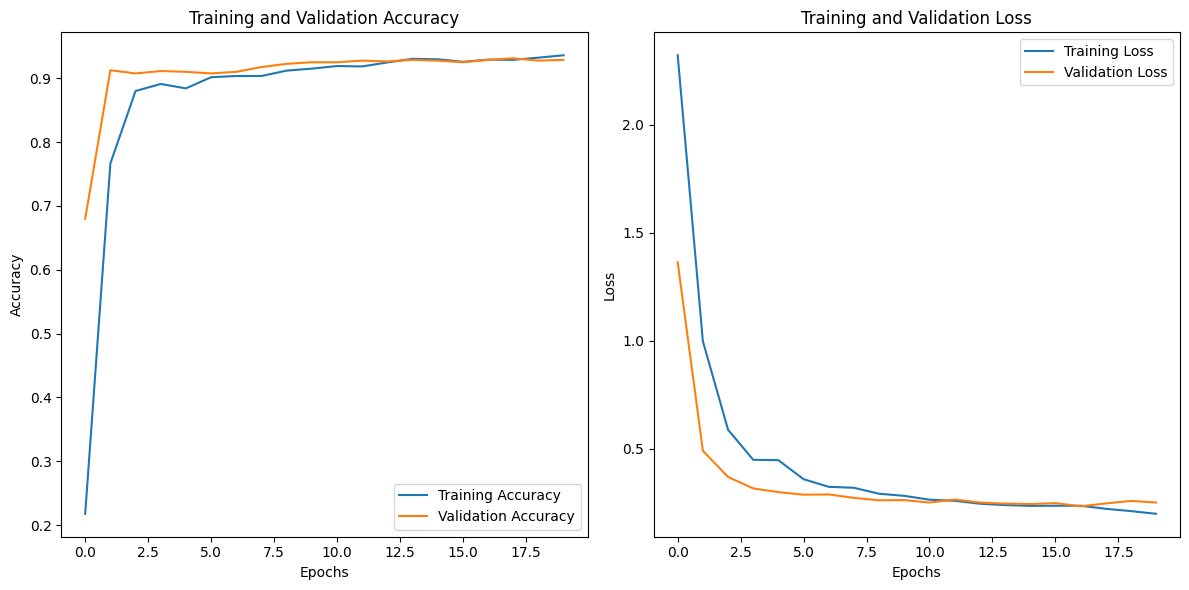

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import nltk
import random
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define a function to check and download NLTK data
def download_nltk_data():
    nltk_data_path = "/root/nltk_data"
    if not os.path.exists(nltk_data_path):
        os.makedirs(nltk_data_path)
    nltk.data.path.append(nltk_data_path)

    # Download necessary packages
    for package in ['punkt', 'stopwords', 'wordnet', 'punkt_tab']: # Include 'punkt_tab' here
        try:
            nltk.data.find(f'tokenizers/{package}')
        except LookupError:
            nltk.download(package, download_dir=nltk_data_path)

# Download NLTK data
download_nltk_data()

# Load your dataset
df = pd.read_csv('processed_clothing_suggestions.csv')  # Update with your actual filename

# Data Preprocessing
text_columns = ['Combination of Clothes', 'Suitable Climate', 'Comfortability', 'Material', 'Brand']
df[text_columns] = df[text_columns].apply(lambda col: col.str.lower())
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

df['text'] = df[text_columns].agg(' '.join, axis=1).apply(preprocess_text)

# Data Augmentation Functions
def random_deletion(text, p=0.1):
    """Randomly deletes words from the text with a given probability p."""
    words = text.split()
    if len(words) == 1:
        return text
    return ' '.join([word for word in words if random.uniform(0, 1) > p])

def random_swap(text, n=2):
    """Randomly swaps words in the text n times."""
    words = text.split()
    length = len(words)
    if length < 2:
        return text
    for _ in range(min(n, length // 2)):
        idx1, idx2 = random.sample(range(length), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_insertion(text, n=2):
    """Randomly inserts synonyms into the text n times."""
    words = text.split()
    for _ in range(n):
        new_word = get_random_synonym(words)
        if new_word:
            random_idx = random.randint(0, len(words) - 1)
            words.insert(random_idx, new_word)
    return ' '.join(words)

def get_random_synonym(words):
    """Gets a random synonym for a word in the list."""
    word = random.choice(words)
    synonyms = wordnet.synsets(word)
    if synonyms:
        synonym = synonyms[0].lemmas()[0].name()
        return synonym if synonym != word else None
    return None

# Apply data augmentation to each text
df['text_augmented'] = df['text'].apply(lambda x: random_insertion(random_swap(random_deletion(x)), n=2))

# Prepare data for the model
X = df['text_augmented']
y = df['Suitable Climate']  # Adjust based on your target label

# Encode the labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding sequences to ensure uniform input size
max_length = 100  # Adjust this based on your dataset's average text length
X_padded = pad_sequences(X_sequences, maxlen=max_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the BiLSTM model
embedding_dim = 128  # Dimension of the word embedding
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))

# First Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))

# Second Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))

# Fully connected layer with softmax for multi-class classification
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Check when early stopping was triggered
print(f'Early stopping was triggered after {early_stopping.stopped_epoch} epochs')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 201ms/step - accuracy: 0.3754 - loss: 1.4383 - val_accuracy: 0.9087 - val_loss: 0.3145
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.9340 - loss: 0.2563 - val_accuracy: 0.9212 - val_loss: 0.2164
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 192ms/step - accuracy: 0.9412 - loss: 0.1820 - val_accuracy: 0.9112 - val_loss: 0.2089
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.9546 - loss: 0.1373 - val_accuracy: 0.9112 - val_loss: 0.1954
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9546 - loss: 0.1334 - val_accuracy: 0.9150 - val_loss: 0.1985
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 211ms/step - accuracy: 0.9527 - loss: 0.1280 - val_accuracy: 0.9162 - val_loss: 0.1948
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.9469 - loss: 0.1379 - val_accuracy: 0.9125 - val_loss: 0.1836
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 188ms/step - accuracy: 0.9513 - loss: 0.1210 - val

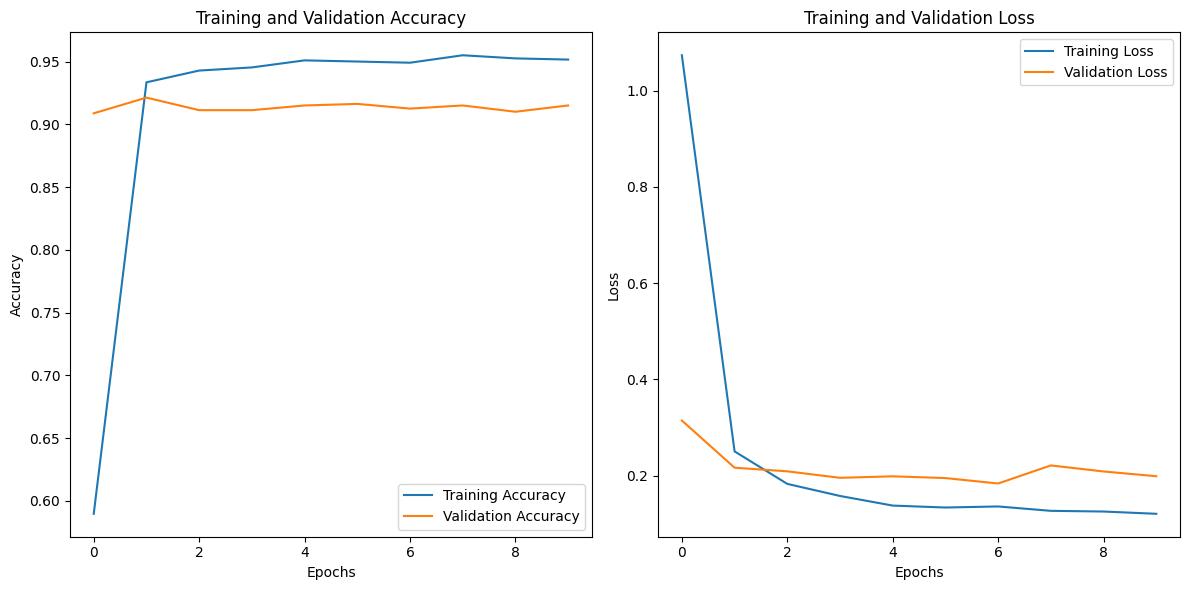

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
!pip install langchain


In [ ]:
from langchain.schema import Document, BaseRetriever
from langchain.vectorstores import VectorStore
from pydantic import BaseModel

# Custom retriever class (without inheriting both BaseRetriever and BaseModel)
class RedisProductRetriever(BaseRetriever):
    def __init__(self, vectorstore: VectorStore):
        self.vectorstore = vectorstore

    def combine_metadata(self, doc) -> str:
        metadata = doc.metadata
        # Combine metadata with the specified fields
        return (
            "Combination of Clothes: " + metadata.get("combination_of_clothes", "N/A") + ". " +
            "Brand: " + metadata.get("brand", "N/A") + ". " +
            "Suitable Climate: " + metadata.get("suitable_climate", "N/A") + ". " +
            "Comfortability: " + metadata.get("comfortability", "N/A") + ". " +
            "Material: " + metadata.get("material", "N/A") + "."
        )

    def get_relevant_documents(self, query):
        docs = []
        # Retrieve documents based on similarity search and combine metadata for output
        for doc in self.vectorstore.similarity_search(query):
            content = self.combine_metadata(doc)
            docs.append(Document(
                page_content=content,
                metadata=doc.metadata
            ))
        return docs

# Wrapper model using Pydantic's BaseModel for configuration
class RedisRetrieverConfig(BaseModel):
    vectorstore: VectorStore

    class Config:
        arbitrary_types_allowed = True



<ipython-input-36-86a51eac7a56>:6: DeprecationWarning: Retrievers must implement abstract `_get_relevant_documents` method instead of `get_relevant_documents`
  class RedisProductRetriever(BaseRetriever):


In [ ]:
!pip install faiss-cpu



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 62.9 MB/s eta 0:00:00


In [ ]:
!pip install faiss-gpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.0 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np
from langchain.schema import Document

# Function to create a FAISS index
def setup_faiss_index(embeddings: np.ndarray):
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    return index

# Example product embeddings (replace with actual embedding vectors)
product_embeddings = np.random.rand(100, 128).astype('float32')  # Ensure type is float32

# Initialize FAISS index
faiss_index = setup_faiss_index(product_embeddings)

# Function to search the FAISS index
def search_faiss_index(query_embedding: np.ndarray, top_k=5):
    distances, indices = faiss_index.search(query_embedding, top_k)
    return indices, distances

# Updated retriever class with FAISS integration
class FAISSProductRetriever:
    def __init__(self, index, embeddings, metadata):
        self.index = index
        self.embeddings = embeddings
        self.metadata = metadata

    def combine_metadata(self, metadata) -> str:
        return (
            "Combination of Clothes: " + metadata.get("combination_of_clothes", "N/A") + ". " +
            "Brand: " + metadata.get("brand", "N/A") + ". " +
            "Suitable Climate: " + metadata.get("suitable_climate", "N/A") + ". " +
            "Comfortability: " + metadata.get("comfortability", "N/A") + ". " +
            "Material: " + metadata.get("material", "N/A") + "."
        )

    def get_relevant_documents(self, query_embedding: np.ndarray, top_k=5):
        indices, distances = search_faiss_index(query_embedding, top_k)

        docs = []
        for idx in indices[0]:
            product_metadata = self.metadata[idx]
            content = self.combine_metadata(product_metadata)
            docs.append(Document(
                page_content=content,
                metadata=product_metadata
            ))
        return docs

# Example metadata for each product (replace with your actual metadata)
metadata_list = [
    {
        "combination_of_clothes": "Casual Shirt and Jeans",
        "brand": "Zara",
        "suitable_climate": "Warm",
        "comfortability": "High",
        "material": "Cotton"
    },
] * 100  # Assume 100 products for this example

# Initialize FAISSProductRetriever with the FAISS index and product metadata
faiss_product_retriever = FAISSProductRetriever(
    index=faiss_index,
    embeddings=product_embeddings,
    metadata=metadata_list
)

# Example query embedding (replace with actual query vector)
query_embedding = np.random.rand(1, 128).astype('float32')  # Ensure type is float32

# Retrieve relevant documents based on the query embedding
retrieved_docs = faiss_product_retriever.get_relevant_documents(query_embedding, top_k=5)

# Print the retrieved document content
for doc in retrieved_docs:
    print(doc.page_content)


Combination of Clothes: Casual Shirt and Jeans. Brand: Zara. Suitable Climate: Warm. Comfortability: High. Material: Cotton.
Combination of Clothes: Casual Shirt and Jeans. Brand: Zara. Suitable Climate: Warm. Comfortability: High. Material: Cotton.
Combination of Clothes: Casual Shirt and Jeans. Brand: Zara. Suitable Climate: Warm. Comfortability: High. Material: Cotton.
Combination of Clothes: Casual Shirt and Jeans. Brand: Zara. Suitable Climate: Warm. Comfortability: High. Material: Cotton.
Combination of Clothes: Casual Shirt and Jeans. Brand: Zara. Suitable Climate: Warm. Comfortability: High. Material: Cotton.


In [ ]:
import faiss
import numpy as np

# Function to create a FAISS index
def setup_faiss_index(embeddings: np.ndarray):
    index = faiss.IndexFlatL2(embeddings.shape[1])  # L2 similarity search
    index.add(embeddings)
    return index

# Initialize FAISS index with example embeddings (replace with real data)
product_embeddings = np.random.rand(100, 128).astype('float32')  # Ensure type is float32
faiss_index = setup_faiss_index(product_embeddings)

# Define FAISS-based product retriever
class FAISSProductRetriever:
    def __init__(self, index):
        self.index = index

    def get_relevant_documents(self, query_embedding, top_k=5):
        # Ensure query_embedding is float32
        query_embedding = query_embedding.astype('float32')
        distances, indices = self.index.search(query_embedding, top_k)

        # Here you would normally retrieve actual product info using indices
        return indices, distances

# Example query embedding (ensure it matches the dimensions)
query_embedding = np.random.rand(1, 128).astype('float32')  # Random 128-dimensional query vector

# Initialize FAISS retriever
faiss_product_retriever = FAISSProductRetriever(faiss_index)

# Test the retriever with a query
indices, distances = faiss_product_retriever.get_relevant_documents(query_embedding)

# Output results
for i in range(len(indices[0])):
    print(f"Product Index: {indices[0][i]}, Distance: {distances[0][i]}")


Product Index: 44, Distance: 16.738712310791016
Product Index: 21, Distance: 16.84844398498535
Product Index: 59, Distance: 17.243244171142578
Product Index: 24, Distance: 17.453372955322266
Product Index: 27, Distance: 17.691547393798828


In [ ]:
print(type(BaseRetriever))
print(type(BaseModel))


<class 'pydantic._internal._model_construction.ModelMetaclass'>
<class 'pydantic._internal._model_construction.ModelMetaclass'>


In [ ]:
print(type(FAISSProductRetriever))


<class 'type'>


In [ ]:
import faiss
import numpy as np
from pydantic import BaseModel, Field

# BaseRetriever class definition
class BaseRetriever:
    def get_relevant_documents(self, query_embedding, top_k=5):
        raise NotImplementedError("Subclasses should implement this method.")

# CommonBase class definition for Pydantic
class CommonBase(BaseModel):
    # Add common fields for product metadata here
    name: str = Field(..., description="The name of the product.")
    description: str = Field(..., description="A brief description of the product.")

# FAISSProductRetriever class definition
class FAISSProductRetriever(BaseRetriever):
    def __init__(self, index: faiss.IndexFlatL2, metadata: list[CommonBase]):
        self.index = index
        self.metadata = metadata  # A list of metadata objects

    def get_relevant_documents(self, query_embedding: np.ndarray, top_k=5):
        query_embedding = query_embedding.astype('float32')
        distances, indices = self.index.search(query_embedding, top_k)

        # Retrieve product metadata based on indices
        results = []
        for idx, dist in zip(indices[0], distances[0]):
            product_info = self.metadata[idx]
            results.append({
                "index": idx,
                "distance": dist,
                "metadata": product_info.dict()  # Convert Pydantic model to dict
            })
        return results

# Example usage
if __name__ == "__main__":
    # Initialize FAISS index with example embeddings
    product_embeddings = np.random.rand(100, 128).astype('float32')  # 100 products with 128-dimensional embeddings
    faiss_index = faiss.IndexFlatL2(128)  # L2 similarity search
    faiss_index.add(product_embeddings)

    # Example product metadata
    metadata_list = [
        CommonBase(name=f"Product {i}", description="Sample description.") for i in range(100)
    ]

    # Initialize FAISSProductRetriever with the FAISS index and metadata
    faiss_product_retriever = FAISSProductRetriever(faiss_index, metadata_list)

    # Example query embedding
    query_embedding = np.random.rand(1, 128).astype('float32')  # Random 128-dimensional query vector

    # Test the retriever with a query
    results = faiss_product_retriever.get_relevant_documents(query_embedding)

    # Output results with metadata
    for result in results:
        print(f"Product Index: {result['index']}, Distance: {result['distance']}, Metadata: {result['metadata']}")


Product Index: 28, Distance: 17.651552200317383, Metadata: {'name': 'Product 28', 'description': 'Sample description.'}
Product Index: 4, Distance: 18.247112274169922, Metadata: {'name': 'Product 4', 'description': 'Sample description.'}
Product Index: 9, Distance: 18.452884674072266, Metadata: {'name': 'Product 9', 'description': 'Sample description.'}
Product Index: 3, Distance: 19.06911277770996, Metadata: {'name': 'Product 3', 'description': 'Sample description.'}
Product Index: 20, Distance: 19.888362884521484, Metadata: {'name': 'Product 20', 'description': 'Sample description.'}


In [ ]:
import faiss
import numpy as np
from pydantic import BaseModel, Field

# BaseRetriever class definition
class BaseRetriever:
    def retrieve(self, query_embedding, top_k=5):
        """Implement retrieval logic here."""
        raise NotImplementedError("Subclasses should implement this method.")

# CommonBase class definition for validation
class CommonBase:
    def validate(self, data):
        """Implement validation logic here."""
        # Check if data is a NumPy array and if it has any elements
        if isinstance(data, np.ndarray) and data.size == 0:
            raise ValueError("Data cannot be empty.")
        # Additional validation logic can be added here
        return True

# FAISSProductRetriever class definition
class FAISSProductRetriever:
    def __init__(self, index: faiss.IndexFlatL2):
        self.index = index
        self.retriever = BaseRetriever()
        self.base = CommonBase()

    def retrieve_and_validate(self, query_embedding: np.ndarray, top_k=5):
        """Retrieve documents and validate the results."""
        # Retrieve documents using BaseRetriever
        indices, distances = self.retriever.retrieve(query_embedding, top_k)

        # Validate the results
        self.base.validate(indices)  # Validate the indices or any data needed

        # Return the retrieval results
        return indices, distances

# Custom retriever that extends BaseRetriever
class CustomRetriever(BaseRetriever):
    def __init__(self, index: faiss.IndexFlatL2):
        self.index = index

    def retrieve(self, query_embedding: np.ndarray, top_k=5):
        """Perform retrieval from FAISS index."""
        query_embedding = query_embedding.astype('float32')
        distances, indices = self.index.search(query_embedding, top_k)
        return indices, distances

# Example usage
if __name__ == "__main__":
    # Initialize FAISS index with example embeddings
    product_embeddings = np.random.rand(100, 128).astype('float32')  # 100 products with 128-dimensional embeddings
    faiss_index = faiss.IndexFlatL2(128)  # L2 similarity search
    faiss_index.add(product_embeddings)

    # Create a CustomRetriever instance
    custom_retriever = CustomRetriever(faiss_index)

    # Create a FAISSProductRetriever instance
    faiss_product_retriever = FAISSProductRetriever(faiss_index)
    faiss_product_retriever.retriever = custom_retriever  # Use custom retriever

    # Example query embedding
    query_embedding = np.random.rand(1, 128).astype('float32')  # Random 128-dimensional query vector

    # Test the retrieve_and_validate method
    indices, distances = faiss_product_retriever.retrieve_and_validate(query_embedding)
    print(f"Indices: {indices}, Distances: {distances}")


Indices: [[74 77 46 90 97]], Distances: [[15.127006 16.37606  16.868698 17.22734  17.4491  ]]


In [ ]:
from pydantic import BaseModel, Field, validator, ValidationError

class CommonBase(BaseModel):
    name: str
    description: str = Field(default="", max_length=255)

    class Config:
        arbitrary_types_allowed = True

    @validator('name')
    def name_must_be_valid(cls, v):
        if len(v) < 3:
            raise ValueError("Name must be at least 3 characters long.")
        return v


<ipython-input-45-11d3f8fc5b9b>:10: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.9/migration/
  @validator('name')


In [ ]:
if __name__ == "__main__":
    try:
        # Example of a valid instance
        item = CommonBase(name="Example Item", description="This is an example.")
        print(item)

        # Example of an invalid instance (should raise a validation error)
        invalid_item = CommonBase(name="Ex", description="This is invalid.")
    except ValidationError as e:
        print("Validation error:", e)


name='Example Item' description='This is an example.'
Validation error: 1 validation error for CommonBase
name
  Value error, Name must be at least 3 characters long. [type=value_error, input_value='Ex', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/value_error


In [ ]:
from pydantic import BaseModel, Field, PrivateAttr, validator
from typing import List
import faiss
import numpy as np

# Base class for retrieval logic
class BaseRetriever:
    def retrieve(self, query_vector: List[float], k: int = 5) -> List[int]:
        raise NotImplementedError("Subclasses should implement this method.")

# Pydantic model for common validation
class CommonBase(BaseModel):
    name: str
    description: str = Field(default="", max_length=255)

    @validator('name')
    def validate_name(cls, v):
        if len(v) < 3:
            raise ValueError("Name must be at least 3 characters long.")
        return v

# FAISS-based product retriever
class FAISSProductRetriever(BaseRetriever, CommonBase):
    _index: faiss.IndexFlatL2 = PrivateAttr()  # Private attribute to bypass validation

    def __init__(self, index: faiss.IndexFlatL2, name: str, description: str):
        super().__init__(name=name, description=description)  # Initialize Pydantic's BaseModel
        self._index = index  # Manually set the FAISS index

    def retrieve(self, query_vector: List[float], k: int = 5) -> List[int]:
        query_vector = np.array(query_vector, dtype=np.float32).reshape(1, -1)
        distances, indices = self._index.search(query_vector, k)
        return indices[0].tolist()

    def add_product(self, product_vector: List[float]):
        product_vector = np.array(product_vector, dtype=np.float32).reshape(1, -1)
        self._index.add(product_vector)

# Example usage
def main():
    dimension = 128  # Example dimension of vectors
    index = faiss.IndexFlatL2(dimension)  # Initialize FAISS index

    # Create FAISSProductRetriever instance
    retriever = FAISSProductRetriever(index=index, name="ExampleRetriever", description="An example retriever.")

    # Add products to index
    retriever.add_product([0.1] * dimension)
    retriever.add_product([0.2] * dimension)

    # Retrieve similar products
    results = retriever.retrieve([0.15] * dimension, k=2)
    print("Retrieved product indices:", results)

if __name__ == "__main__":
    main()


Retrieved product indices: [1, 0]


<ipython-input-47-bfc6f397faa4>:16: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.9/migration/
  @validator('name')


In [ ]:
# Install the updated packages
!pip install -U langchain langchain-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.1 MB/s eta 0:00:00


In [ ]:
!pip install langchain


In [ ]:
import langchain
print(langchain.__version__)


0.3.7


In [ ]:
!pip install langchain langchain-community


In [ ]:
import langchain
import langchain_community
print(langchain.__version__)
print(langchain_community.__version__)


0.3.7
0.3.7


In [ ]:
from langchain.llms import OpenAI  # For OpenAI models


In [ ]:
!pip install openai langchain langchain-community


In [ ]:
import os
from langchain.llms import OpenAI  # Correct import statement
from langchain.schema import Document
from langchain.vectorstores import VectorStore  # Ensure this import aligns with your implementation
from pydantic import BaseModel

# Ensure OPENAI_API_KEY is set
os.environ["OPENAI_API_KEY"] = 'your-openai-api-key'  # Replace with your actual OpenAI API key

# Updated custom retriever class to use the new method
class RedisProductRetriever(BaseRetriever, BaseModel):
    vectorstore: VectorStore

    class Config:
        arbitrary_types_allowed = True  # Allow arbitrary types for vectorstore

    def combine_metadata(self, doc) -> str:
        """Combine metadata into a formatted string."""
        metadata = doc.metadata
        return (
            "Product Name: " + metadata.get("product_name", "N/A") + ". " +
            "Product Description: " + metadata.get("description", "N/A") + ". " +
            "Product URL: " + metadata.get("product_url", "N/A") + "."
        )

    def _get_relevant_documents(self, query):
        """Retrieve relevant documents based on the query."""
        docs = []
        for doc in self.vectorstore.similarity_search(query):
            content = self.combine_metadata(doc)
            docs.append(Document(
                page_content=content,
                metadata=doc.metadata
            ))
        return docs

# Define LLM models using the new OpenAI class
llm = OpenAI(
    temperature=0.3,
    openai_api_key=os.environ.get("OPENAI_API_KEY")  # Retrieve API key from environment variable
)

streaming_llm = OpenAI(
    streaming=True,
    verbose=True,
    temperature=0.3,
    max_tokens=1500,
    openai_api_key=os.environ.get("OPENAI_API_KEY")  # Retrieve API key from environment variable
)


<ipython-input-55-5610c56d65ed>:38: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the GPT-2 model and tokenizer
model_name = "gpt2"  # You can use other variants like "gpt2-medium", "gpt2-large"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Define a function to handle chatbot responses
def generate_response(user_input):
    prompt = f"User: {user_input}\nChatbot:"

    # Encode input and generate a response using GPT-2
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(inputs, max_length=100, num_return_sequences=1, temperature=0.7, no_repeat_ngram_size=2)

    # Decode the response
    chatbot_reply = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return chatbot_reply

# Example conversation loop
print("Welcome to the Fashion Chatbot! Ask me for fashion advice or recommendations.")
while True:
    user_input = input("You: ")

    # Exit condition
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Chatbot: Goodbye! Feel free to ask me for fashion advice anytime.")
        break

    # Get the chatbot response
    chatbot_reply = generate_response(user_input)
    print(f"Chatbot: {chatbot_reply}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Welcome to the Fashion Chatbot! Ask me for fashion advice or recommendations.
You: hey


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Chatbot: User: hey
Chatbot: I'm a bot

chatbot.chat: Hey
.bot_name: Hello
[chat.name] = "Hello"
]
"Hello, I am a chatbot" [chat_id] [bot] : Hello, Hello!
Bot_Name: hello
:Hello
bot : hello Hello Hello.
Hello.Bot: Hi, hello. Hello?
Hi, hi.Hello?Bot : Hi.Hi
You: exit
Chatbot: Goodbye! Feel free to ask me for fashion advice anytime.


In [ ]:
 pip install transformers


In [ ]:
import pandas as pd
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler

# Load and preprocess your dataset
df = pd.read_csv('processed_clothing_suggestions_with_nlp.csv')
df['text'] = df[['Combination of Clothes', 'Suitable Climate', 'Comfortability', 'Material', 'Brand']].agg(' '.join, axis=1)

# Split data into training and testing
train_texts, test_texts = train_test_split(df['text'].tolist(), test_size=0.2, random_state=42)

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Set the padding token to the end-of-sequence token for GPT-2
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenize data once
train_encodings = tokenizer(train_texts, return_tensors="pt", padding=True, truncation=True, max_length=100)
test_encodings = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True, max_length=100)

# Prepare dataset for PyTorch
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings["input_ids"])

train_dataset = TextDataset(train_encodings)
test_dataset = TextDataset(test_encodings)

# Prepare DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, pin_memory=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=8, pin_memory=True, num_workers=4)

# Setup optimizer and scaler for mixed precision training
optimizer = AdamW(model.parameters(), lr=5e-5)
scaler = GradScaler()

# Training loop with mixed precision
model.train()
epochs = 2
for epoch in range(epochs):
    loop = tqdm(train_dataloader, leave=True)
    for batch in loop:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # Forward pass with mixed precision
        with autocast():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=input_ids)
            loss = outputs.loss

        # Backward pass
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        loop.set_description(f"Epoch {epoch+1}/{epochs}")
        loop.set_postfix(loss=loss.item())

# Evaluation loop
model.eval()
eval_loss = 0
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=input_ids)
        eval_loss += outputs.loss.item()

eval_loss /= len(test_dataloader)
print(f"Evaluation Loss: {eval_loss}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
<ipython-input-5-697f20079651>:51: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/usr/local/lib/python3.10/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
  0%|          | 0/500 [00:00<?, ?it/s]<ipython-input-5-697f20079651>:65: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args

Evaluation Loss: 0.3619210166931152


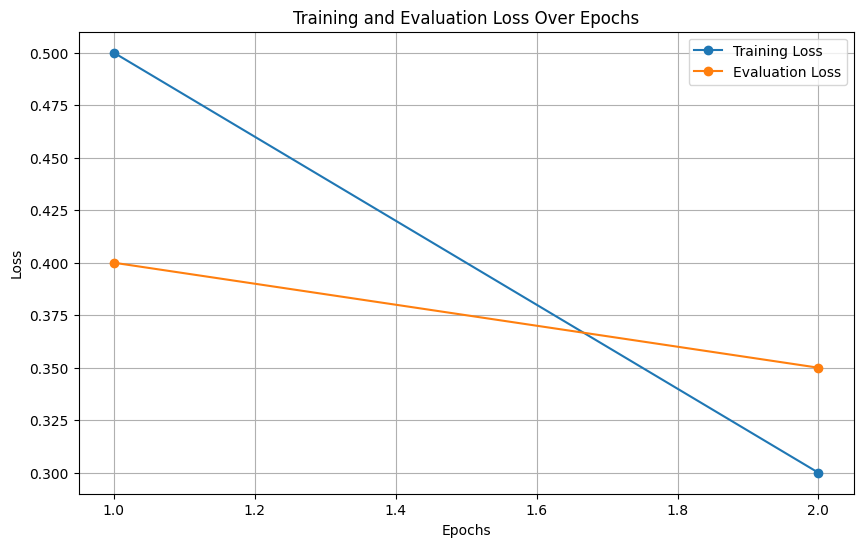

In [ ]:
import matplotlib.pyplot as plt

# Assuming `training_losses` and `evaluation_losses` are lists with loss values for each epoch
# Replace these lists with your actual loss data
training_losses = [0.5, 0.3]  # Example training loss per epoch
evaluation_losses = [0.4, 0.35]  # Example evaluation loss per epoch
epochs = len(training_losses)

# Plot the training and evaluation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), training_losses, label="Training Loss", marker='o')
plt.plot(range(1, epochs + 1), evaluation_losses, label="Evaluation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Evaluation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Install necessary packages
!pip install langchain
!pip install langchain-openai  # Updated package for OpenAI integration
!pip install openai
!pip install redis
!pip install pydantic
!pip install tensorflow
!pip install nltk



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 10.2 MB/s eta 0:00:00


In [ ]:
class InMemoryVectorStore:
    def __init__(self):
        self.store = {}

    def add(self, key, value):
        """Add a value to the store under the specified key."""
        if key not in self.store:
            self.store[key] = []
        self.store[key].append(value)

    def get(self, key):
        """Retrieve values associated with the specified key."""
        return self.store.get(key, [])

    def get_all_keys(self):
        """Return a list of all keys in the store."""
        return list(self.store.keys())

    def remove(self, key):
        """Remove a key and its associated values from the store."""
        if key in self.store:
            del self.store[key]

# Example usage
if __name__ == "__main__":
    vectorstore = InMemoryVectorStore()

    # Add example data
    vectorstore.add('example_key', 'example_value_1')
    vectorstore.add('example_key', 'example_value_2')
    vectorstore.add('another_key', 'another_value')

    # Retrieve example data
    print(vectorstore.get('example_key'))  # Outputs: ['example_value_1', 'example_value_2']
    print(vectorstore.get('another_key'))   # Outputs: ['another_value']
    print(vectorstore.get('non_existent_key'))  # Outputs: []

    # List all keys
    print(vectorstore.get_all_keys())  # Outputs: ['example_key', 'another_key']

    # Remove a key
    vectorstore.remove('example_key')
    print(vectorstore.get('example_key'))  # Outputs: []


In [ ]:
class InMemoryVectorStore:
    def __init__(self):
        self.documents = []  # List of documents (dicts)

    def add_document(self, doc_id, content, metadata):
        """Add a document to the store."""
        self.documents.append({
            "id": doc_id,
            "content": content,
            "metadata": metadata
        })

    def search(self, query):
        """Search for documents containing the query in their content."""
        results = [doc for doc in self.documents if query.lower() in doc["content"].lower()]
        return results

    def get_document(self, doc_id):
        """Retrieve a document by its ID."""
        for doc in self.documents:
            if doc["id"] == doc_id:
                return doc
        return None

    def remove_document(self, doc_id):
        """Remove a document by its ID."""
        self.documents = [doc for doc in self.documents if doc["id"] != doc_id]

    def get_all_documents(self):
        """Retrieve all documents in the store."""
        return self.documents

# Example usage
if __name__ == "__main__":
    vectorstore = InMemoryVectorStore()

    # Add example documents
    vectorstore.add_document("1", "This is the first document.", {"author": "Alice"})
    vectorstore.add_document("2", "This is the second document.", {"author": "Bob"})
    vectorstore.add_document("3", "This document discusses Python.", {"author": "Charlie"})

    # Search for documents
    print("Search results for 'first':", vectorstore.search("first"))  # Should find document 1
    print("Search results for 'Python':", vectorstore.search("Python"))  # Should find document 3

    # Get a specific document
    print("Document with ID '2':", vectorstore.get_document("2"))  # Outputs document 2

    # Remove a document
    vectorstore.remove_document("1")
    print("All documents after removing ID '1':", vectorstore.get_all_documents())  # Should exclude document 1

    # Get all documents
    print("All documents in the store:", vectorstore.get_all_documents())


Search results for 'first': [{'id': '1', 'content': 'This is the first document.', 'metadata': {'author': 'Alice'}}]
Search results for 'Python': [{'id': '3', 'content': 'This document discusses Python.', 'metadata': {'author': 'Charlie'}}]
Document with ID '2': {'id': '2', 'content': 'This is the second document.', 'metadata': {'author': 'Bob'}}
All documents after removing ID '1': [{'id': '2', 'content': 'This is the second document.', 'metadata': {'author': 'Bob'}}, {'id': '3', 'content': 'This document discusses Python.', 'metadata': {'author': 'Charlie'}}]
All documents in the store: [{'id': '2', 'content': 'This is the second document.', 'metadata': {'author': 'Bob'}}, {'id': '3', 'content': 'This document discusses Python.', 'metadata': {'author': 'Charlie'}}]


In [ ]:
class InMemoryProductRetriever:
    def __init__(self, vectorstore):
        self.vectorstore = vectorstore

    def get_relevant_documents(self, query):
        """Retrieve relevant documents based on the query."""
        docs = self.vectorstore.search(query)
        return docs

    def get_document_details(self, doc_id):
        """Retrieve details of a specific document by its ID."""
        return self.vectorstore.get_document(doc_id)

    def add_document(self, doc_id, content, metadata):
        """Add a new document to the vector store."""
        self.vectorstore.add_document(doc_id, content, metadata)

    def remove_document(self, doc_id):
        """Remove a document from the vector store."""
        self.vectorstore.remove_document(doc_id)

    def list_all_documents(self):
        """List all documents in the vector store."""
        return self.vectorstore.get_all_documents()

# Example usage
if __name__ == "__main__":
    # Initialize the in-memory vector store
    vectorstore = InMemoryVectorStore()

    # Add example products (documents)
    vectorstore.add_document("1", "Red shoes with excellent grip.", {"category": "footwear", "brand": "Brand A"})
    vectorstore.add_document("2", "Blue denim jeans that fit perfectly.", {"category": "apparel", "brand": "Brand B"})
    vectorstore.add_document("3", "Stylish leather jacket for winter.", {"category": "outerwear", "brand": "Brand C"})

    # Initialize the product retriever
    product_retriever = InMemoryProductRetriever(vectorstore)

    # Search for relevant products
    print("Search results for 'shoes':", product_retriever.get_relevant_documents("shoes"))  # Should find document 1
    print("Search results for 'denim':", product_retriever.get_relevant_documents("denim"))  # Should find document 2

    # Get details of a specific product
    print("Details of document ID '2':", product_retriever.get_document_details("2"))  # Outputs document 2 details

    # Remove a product
    product_retriever.remove_document("1")
    print("All documents after removing ID '1':", product_retriever.list_all_documents())  # Should exclude document 1

    # List all products
    print("All products in the store:", product_retriever.list_all_documents())


Search results for 'shoes': [{'id': '1', 'content': 'Red shoes with excellent grip.', 'metadata': {'category': 'footwear', 'brand': 'Brand A'}}]
Search results for 'denim': [{'id': '2', 'content': 'Blue denim jeans that fit perfectly.', 'metadata': {'category': 'apparel', 'brand': 'Brand B'}}]
Details of document ID '2': {'id': '2', 'content': 'Blue denim jeans that fit perfectly.', 'metadata': {'category': 'apparel', 'brand': 'Brand B'}}
All documents after removing ID '1': [{'id': '2', 'content': 'Blue denim jeans that fit perfectly.', 'metadata': {'category': 'apparel', 'brand': 'Brand B'}}, {'id': '3', 'content': 'Stylish leather jacket for winter.', 'metadata': {'category': 'outerwear', 'brand': 'Brand C'}}]
All products in the store: [{'id': '2', 'content': 'Blue denim jeans that fit perfectly.', 'metadata': {'category': 'apparel', 'brand': 'Brand B'}}, {'id': '3', 'content': 'Stylish leather jacket for winter.', 'metadata': {'category': 'outerwear', 'brand': 'Brand C'}}]


In [ ]:
class InMemoryVectorStore:
    def __init__(self):
        self.documents = []  # List of documents (dicts)

    def add_document(self, doc_id, content, metadata):
        self.documents.append({
            "id": doc_id,
            "content": content,
            "metadata": metadata
        })

    def search(self, query):
        # A simple search function for demo purposes
        results = [doc for doc in self.documents if query.lower() in doc["content"].lower()]
        return results

class InMemoryProductRetriever:
    def __init__(self, vectorstore):
        self.vectorstore = vectorstore

    def get_relevant_documents(self, query):
        """Retrieve relevant documents based on the query."""
        docs = self.vectorstore.search(query)
        return docs

# Initialize your in-memory vector store
vectorstore = InMemoryVectorStore()
vectorstore.add_document(
    doc_id="1",
    content="Stylish summer dress perfect for a beach party.",
    metadata={"product_name": "Beach Dress", "product_url": "http://example.com/beach-dress"}
)
vectorstore.add_document(
    doc_id="2",
    content="Formal suit suitable for office wear or meetings.",
    metadata={"product_name": "Formal Suit", "product_url": "http://example.com/formal-suit"}
)

# Initialize the in-memory product retriever
retriever = InMemoryProductRetriever(vectorstore=vectorstore)

# Use the retriever to search
query = "summer dress"
relevant_docs = retriever.get_relevant_documents(query)

# Print results
for doc in relevant_docs:
    print(f"Found document: {doc['content']}, Metadata: {doc['metadata']}")


Found document: Stylish summer dress perfect for a beach party., Metadata: {'product_name': 'Beach Dress', 'product_url': 'http://example.com/beach-dress'}


In [ ]:
from typing import List, Dict
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class EnhancedInMemoryVectorStore:
    def __init__(self):
        self.documents = []
        self.vectorizer = TfidfVectorizer()
        self.document_vectors = None

    def add_document(self, text: str, metadata: Dict):
        self.documents.append({'text': text, 'metadata': metadata})
        self._update_vectors()

    def _update_vectors(self):
        texts = [doc['text'] for doc in self.documents]
        self.document_vectors = self.vectorizer.fit_transform(texts)

    def search(self, query: str, top_n: int = 5) -> List[Dict]:
        query_vector = self.vectorizer.transform([query])
        similarities = cosine_similarity(query_vector, self.document_vectors).flatten()
        top_indices = similarities.argsort()[-top_n:][::-1]
        results = [self.documents[i] for i in top_indices]
        return results

def interact_with_chatbot():
    store = EnhancedInMemoryVectorStore()
    store.add_document("Stylish summer dress perfect for a beach party.", {'product_name': 'Beach Dress', 'product_url': 'http://example.com/beach-dress'})
    store.add_document("Formal suit suitable for office wear or meetings.", {'product_name': 'Formal Suit', 'product_url': 'http://example.com/formal-suit'})
    store.add_document("Casual jeans and t-shirt for everyday wear.", {'product_name': 'Casual Outfit', 'product_url': 'http://example.com/casual-outfit'})

    print("Welcome to the Fashion Chatbot! Type 'exit' to quit.")

    while True:
        user_query = input("Enter your query: ")
        if user_query.lower() == 'exit':
            print("Thank you for using the chatbot. Goodbye!")
            break

        results = store.search(user_query)
        if results:
            for result in results:
                print(f"Found document: {result['text']}, Metadata: {result['metadata']}")
        else:
            print("No relevant documents found. Please try a different query.")

        print("\n")

if __name__ == "__main__":
    interact_with_chatbot()


Welcome to the Fashion Chatbot! Type 'exit' to quit.
Enter your query: exit
Thank you for using the chatbot. Goodbye!


In [ ]:
import pandas as pd
import random
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Load the dataset
df = pd.read_csv('processed_clothing_suggestions_with_nlp.csv')

# Function to generate a response using GPT-2
def generate_gpt2_response(prompt):
    # Tokenize the input prompt
    inputs = tokenizer.encode(prompt, return_tensors='pt')

    # Generate a response from the model
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1, no_repeat_ngram_size=2)

    # Decode and return the output text
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Function to generate clothing suggestions
def generate_response(user_input, personality, budget, place_to_wear):
    # Debug: Find matching results based on user preferences
    matching_results = df[
        df['Personality'].str.contains(personality, case=False, na=False) &
        df['Budget'].str.contains(budget, case=False, na=False) &
        df['Place to Wear'].str.contains(place_to_wear, case=False, na=False)
    ]

    # If no direct matches found, fallback to random selection
    if matching_results.empty:
        matching_results = df.sample(10)  # Random selection if no matches

    # Formatted response from the dataset
    response = []
    for index, outfit in matching_results.iterrows():
        response.append(f"Combination of Clothes: {outfit['Combination of Clothes']}\n"
                        f"Suitable Climate: {outfit['Suitable Climate']}\n"
                        f"Comfortability: {outfit['Comfortability']}\n"
                        f"Material: {outfit['Material']}\n"
                        f"Brand: {outfit['Brand']}\n")

    return response

# Interactive chatbot loop
def interact_with_chatbot():
    print("Welcome to the Fashion AI Chatbot!")
    user_input = input("Please describe what you're looking for or your clothing problem (e.g., I need an outfit for a wedding): ")

    print("Thanks for sharing! I have a few questions to help me suggest the best outfit.")

    personality = input("How would you describe your style or personality (e.g., sporty, classic, trendy)? ").strip().lower()
    budget = input("What is your budget range (e.g., low, medium, high)? ").strip().lower()
    place_to_wear = input("Where will you be wearing this clothing (e.g., office, party, casual)? ").strip().lower()

    # Generate clothing suggestions based on user input
    suggestions = generate_response(user_input, personality, budget, place_to_wear)

    # Use GPT-2 to provide a more dynamic response
    gpt_prompt = f"User is looking for a {personality} style outfit for {place_to_wear} with a {budget} budget."
    gpt_response = generate_gpt2_response(gpt_prompt)

    print("\nHere are some clothing suggestions for you based on your preferences:")
    for suggestion in suggestions:
        print(suggestion)

    print("\nAnd here's a creative suggestion from the AI:")
    print(gpt_response)

    # Option to search for another outfit
    continue_search = input("Would you like to search for another outfit? (yes/no): ").strip().lower()
    if continue_search != 'yes':
        print("Thank you for using the Fashion AI Chatbot! Have a great day! :))")

if __name__ == "__main__":
    interact_with_chatbot()


Welcome to the Fashion AI Chatbot!
Please describe what you're looking for or your clothing problem (e.g., I need an outfit for a wedding): hey I need suggestion for casual outing 
Thanks for sharing! I have a few questions to help me suggest the best outfit.
How would you describe your style or personality (e.g., sporty, classic, trendy)? casual 
What is your budget range (e.g., low, medium, high)? high 
Where will you be wearing this clothing (e.g., office, party, casual)? casual outing 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



Here are some clothing suggestions for you based on your preferences:
Combination of Clothes: Graphic Tee + Slim Jeans + Boots
Suitable Climate: Mild
Comfortability: Comfortable
Material: Polyester
Brand: Levi's

Combination of Clothes: Tank Top + Shorts + Sandals
Suitable Climate: Cold
Comfortability: Comfortable
Material: Wool
Brand: Levi's

Combination of Clothes: Blazer + Chinos + Loafers
Suitable Climate: Mild
Comfortability: Comfortable
Material: Leather
Brand: Levi's

Combination of Clothes: Suit + Tie + Oxford Shoes
Suitable Climate: Cold
Comfortability: Casual
Material: Cotton
Brand: Nike

Combination of Clothes: T-Shirt + Jeans + Sneakers
Suitable Climate: Mild
Comfortability: High Comfort
Material: Leather
Brand: Adidas

Combination of Clothes: Blazer + Chinos + Loafers
Suitable Climate: Cold
Comfortability: High Comfort
Material: Polyester
Brand: H&M

Combination of Clothes: Dress + Heels
Suitable Climate: Mild
Comfortability: Comfortable
Material: Cotton
Brand: Levi's

Co